In [96]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [97]:
svpath_ns = "../../Data/NASA_kepler/mps_saves/C2C4legendreNN2_ns_d20_chi60.jld2";
dloc =  "../../Data/NASA_kepler/datasets/KeplerLightCurves_C2_C4.jld2";

In [98]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")[:, 1:200]
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")[:, 1:200]
    y_test = read(f, "y_test")
close(f)

In [99]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 427 training samples and 185 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 60

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [100]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

In [172]:
max_jump=nothing
class = 1
interp_sites = collect(100:120)
instance_idx = 35
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);

(i, x_prev, mx) = (1, 0.1458890187263675, 0.1477)
(i, x_prev, mx) = (2, 0.1477, 0.1484)
(i, x_prev, mx) = (3, 0.1484, 0.148)
(i, x_prev, mx) = (4, 0.148, 0.1479)
(i, x_prev, mx) = (5, 0.1479, 0.1478)
(i, x_prev, mx) = (6, 0.1478, 0.1477)
(i, x_prev, mx) = (7, 0.1477, 0.1476)
(i, x_prev, mx) = (8, 0.1476, 0.1474)
(i, x_prev, mx) = (9, 0.1474, 0.1476)
(i, x_prev, mx) = (10, 0.1476, 0.1479)
(i, x_prev, mx) = (11, 0.1479, 0.1477)
(i, x_prev, mx) = (12, 0.1477, 0.1478)
(i, x_prev, mx) = (13, 0.1478, 0.1479)
(i, x_prev, mx) = (14, 0.1479, 0.1482)
(i, x_prev, mx) = (15, 0.1482, 0.1474)
(i, x_prev, mx) = (16, 0.1474, 0.1476)
(i, x_prev, mx) = (17, 0.1476, 0.1477)
(i, x_prev, mx) = (18, 0.1477, 0.1481)
(i, x_prev, mx) = (19, 0.1481, 0.1478)
(i, x_prev, mx) = (20, 0.1478, 0.148)
(i, x_prev, mx) = (21, 0.148, 0.1473)


╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│    MAE │ 8.01307e-6 │
│ NN_MAE │ 7.27422e-6 │
╰────────┴────────────╯


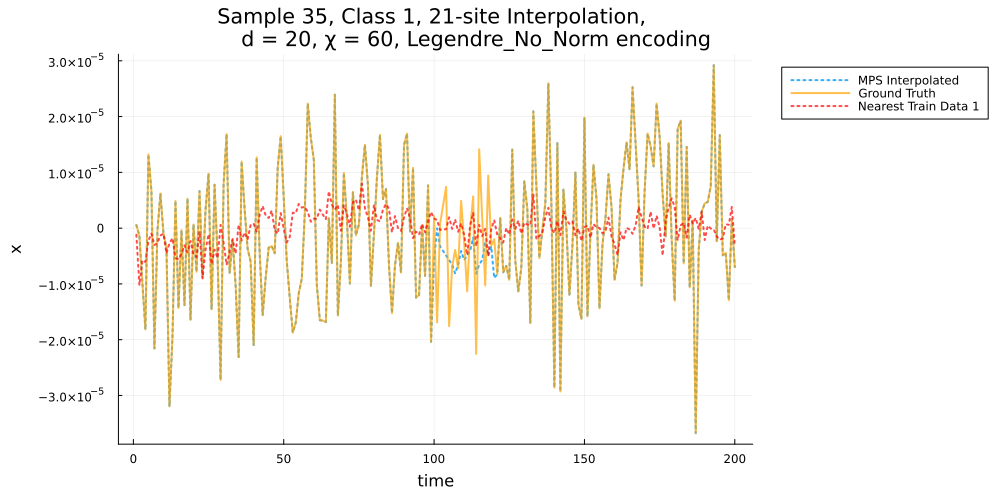

In [173]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)